<a href="https://colab.research.google.com/github/mwaki0626/Trash_Recycling_Points/blob/master/Deliverable_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip3 install https://github.com/OlafenwaMoses/ImageAI/releases/download/2.0.2/imageai-2.0.2-py3-none-any.whl
%tensorflow_version 1.x

     |████████████████████████████████| 153kB 279kB/s 
TensorFlow is already loaded. Please restart the runtime to change versions.


Preprocessing

Mounted at /content/drive/
RESIZED (220, 220, 3)


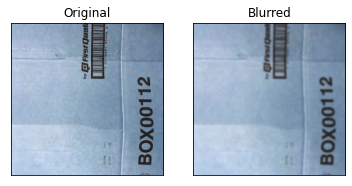

In [47]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os 
from google.colab import drive
import cv2
from skimage import color
from skimage import io

from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
import os
import imageio
import io
#import urllib.request
import matplotlib.image as mpimg


drive.mount('/content/drive/', force_remount = True)
#os.chdir ("/content/drive/My Drive/MAIS 202/Garbage classification") 

filepath = "/content/drive/My Drive/MAIS 202/Garbage classification/All Images"

def loadImages(path):
    '''Put files into lists and return them as one list with all images 
     in the folder'''
    image_files = sorted([os.path.join(path, file)
                  for file in os.listdir(path)
                  if file.endswith('.jpg')])
      
    return image_files



def display(a, b, title1 = "Original", title2 = "Edited"):
    plt.subplot(121), plt.imshow(a), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(b), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.show()

res_img = []

def preprocessing (dataset):
    dataset = loadImages(filepath)

    # RESIZING IMAGES 
    height = 220
    width = 220
    dim = (width, height)
    
    #for pic in dataset: 
    img_list = [cv2.imread(i, cv2.IMREAD_UNCHANGED)for i in dataset[:3]]

    #img = [cv2.imread(i, cv2.IMREAD_UNCHANGED) for i in dataset]
    for i in range(len(img_list)):
      res = cv2.resize(img_list[i], dim, interpolation=cv2.INTER_LINEAR)
      res_img.append(res)

    # Checking the size
    try:
      print('RESIZED', res_img[1].shape)
    except AttributeError:
      print("shape not found")


    no_noise = []
    for i in range(len(res_img)):
      blur = cv2.GaussianBlur(res_img[i], (5, 5), 0)
      no_noise.append(blur)

    image = no_noise[1]
    original = res_img[1]
    display(original, image, 'Original', 'Blurred')


    # RGB TO GREY 
    final_preprocessed = []

    counter = 0 

    for pic in no_noise: 
      img = Image.fromarray(pic)
      counter += 1 
      gs_image = img.convert(mode='L')
      final_preprocessed.append(gs_image)
      save_path = "/content/drive/My Drive/MAIS 202/Garbage classification/Preprocessed Images/"  + str(counter) + ".jpeg"
      
      save_image = cv2.imwrite(save_path, np.array(gs_image))

    return final_preprocessed


dataset = loadImages(filepath)
#attempt = Image.open (dataset[0])
#attempt.show()
preprocessed = preprocessing (dataset)











Pretrained Model: Feature Extraction



Mounted at /content/drive/
RESIZED (220, 220, 3)


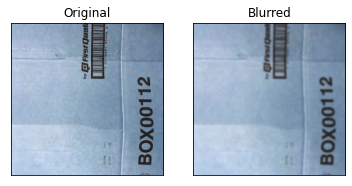

553467904/553467096 [==============================] - 11s 0us/step
[INFO] processed -1
[INFO] processed -2
[INFO] processed -3
[INFO] processed -4
[INFO] processed -5
[INFO] processed -6
[INFO] processed -7
[INFO] processed -8
[INFO] processed -9
[INFO] processed -10
[INFO] processed -11
[INFO] processed -12
[INFO] processed -13
[INFO] processed -14
[INFO] processed -15
[INFO] processed -16
[INFO] processed -17
[INFO] processed -18
[INFO] processed -19
[INFO] processed -20
[INFO] processed -21
[INFO] processed -22
[INFO] processed -23
[INFO] processed -24
[INFO] processed -25
[INFO] processed -26
[INFO] processed -27
[INFO] processed -28
[INFO] processed -29
[INFO] processed -30
[INFO] processed -31
[INFO] processed -32
[INFO] processed -33
[INFO] processed -34
[INFO] processed -35
[INFO] processed -36
[INFO] processed -37
[INFO] processed -38
[INFO] processed -39
[INFO] processed -40
[INFO] processed -41
[INFO] processed -42
[INFO] processed -43
[INFO] processed -44
[INFO] processed 

In [6]:
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing import image
from keras.models import Model
from keras.models import Input 
from google.colab import drive
import os

from sklearn.preprocessing import LabelEncoder
import numpy as np 
import glob 
import cv2
import h5py
import glob 
import json


drive.mount('/content/drive/', force_remount = True)
trainpath = "/content/drive/My Drive/MAIS 202/Garbage classification/Train"
classifier_path = "/content/drive/My Drive/MAIS 202/classifier.pickle"
train_labels = os.listdir(trainpath)

dataset = loadImages(trainpath)
preprocessed = preprocessing (dataset)

# training details 
class_limit = 6 
image_size = (224, 224)
weights = 
base_model = VGG16(weights=weights)
model = Model(base_model.input, base_model.get_layer('fc1').output)
model_path = "/content/drive/My Drive/MAIS 202/model"
features_path = "/content/drive/My Drive/MAIS 202/features.h5"
labels_path = "/content/drive/My Drive/MAIS 202/labels.h5"
test_size = 0.10
seed = 9
num_classes = 17


features = []
labels = []
le = LabelEncoder() 
le.fit ([tl for tl in trainpath])

# loop over  all labels in the folder 
count = 1 
for i, label in enumerate (train_labels): 
  cur_path = trainpath + "/" + label 
  count = 1 
  for image_path in glob.glob(cur_path + "/*.jpg"):
    img = image.load_img(image_path, target_size = image_size)
    x = image.img_to_array(img)
    x = np.expand_dims (x, axis = 0)
    x = preprocess_input(x)
    feature = model.predict(x)
    flat = feature.flatten()
    features.append(flat)
    labels.append(label)
    print ("[INFO] processed -" + str(count))
    count += 1
  print ("[INFO] completed label -" + label)


le_labels = le.fit_transform(labels)
print ("[STATUS] training labels: {}".format(le_labels))
print ("[STATUS] training labels shape: {}".format(le_labels.shape))


h5f_data = h5py.File(features_path, 'w')
h5f_data.create_dataset('dataset_1', data=np.array(features))

h5f_label = h5py.File(labels_path, 'w')
h5f_label.create_dataset('dataset_1', data=np.array(le_labels))

h5f_data.close()
h5f_label.close()

model_json = model.to_json()
with open (model_path + str(test_size) + ".json", "w") as json_file:
  json_file.write(model_json)

model.save_weights(model_path + str(test_size) + ".h5")
print ("[STATUS] saved model and weights to disk..")

print ("[STATUS] features and labels saved..")




Training

[STATUS] training labels: [5 5 5 ... 4 4 4]
[STATUS] training labels shape: (2527,)
[INFO] features shape: (2527, 4096)
[INFO] labels shape: (2527,)
[INFO] training started...
[INFO] splitting train and test data...
[INFO] train data: (2274, 4096)
[INFO] test data: (253, 4096)
[INFO] train labels: (2274,)
[INFO] test labels: (253,)
[INFO] creating model...


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[INFO] evaluating model...
[INFO] saving model...
[INFO] confusion matrix


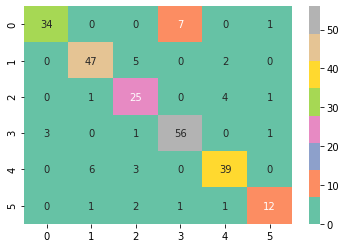

In [7]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import numpy as np
import h5py
import os
import json
import pickle
import seaborn as sns
import matplotlib.pyplot as plt 

results = "/content/drive/My Drive/MAIS 202/results.txt"

le_labels = le.fit_transform(labels)
print ("[STATUS] training labels: {}".format(le_labels))
print ("[STATUS] training labels shape: {}".format(le_labels.shape))


h5f_data = h5py.File(features_path, 'r')
h5f_label = h5py.File(labels_path, 'r')


features_string = h5f_data['dataset_1'][...]
labels_string = h5f_label['dataset_1'][...]

features = np.array(features_string)
labels = np.array (labels_string)

h5f_data.close()
h5f_label.close()

print ("[INFO] features shape: {}".format(features.shape))
print ("[INFO] labels shape: {}".format(labels.shape))

print ("[INFO] training started...")
(trainData, testData, trainLabels, testLabels) = train_test_split(np.array(features),
                                                                  np.array(labels),
                                                                  test_size = test_size,
                                                                  random_state = seed)
print ("[INFO] splitting train and test data...")
print ("[INFO] train data: {}".format (trainData.shape))
print ("[INFO] test data: {}".format (testData.shape))
print ("[INFO] train labels: {}".format (trainLabels.shape))
print ("[INFO] test labels: {}".format (testLabels.shape))

# use logistic regression as the model
print ("[INFO] creating model...")
model = LogisticRegression(random_state = seed)
model.fit(trainData, trainLabels)

print ("[INFO] evaluating model...")
f = open(results, "w")
rank_1 = 0 
rank_5 = 0 


for (label, features) in zip (testLabels, testData):
  predictions = model.predict_proba(np.atleast_2d(features))[0]
  predictions = np.argsort (predictions) [::-1][:5]

  if label == predictions[0]:
    rank_1 += 1

  if label in predictions:
    rank_5 += 1 

rank_1 = (rank_1 / float(len(testLabels))) * 100 
rank_5 = (rank_5 / float(len(testLabels))) * 100 

rank_1 = (rank_1 / float(len(testLabels))) * 100
rank_5 = (rank_5 / float(len(testLabels))) * 100

f.write("Rank-1: {:.2f}%\n".format(rank_1))
f.write("Rank-5: {:.2f}%\n\n".format(rank_5))

preds = model.predict(testData)

f.write ("{}\n".format(classification_report(testLabels, preds)))
f.close()

print ("[INFO] saving model...")
pickle.dump (model, open(classifier_path, 'wb'))

print ("[INFO] confusion matrix")

labels = sorted(list(os.listdir(trainpath)))

cm = confusion_matrix (testLabels, preds)
sns.heatmap (cm, annot = True, cmap = "Set2")

plt.show()



In [8]:
# opening the pickle file to see contents 

from google.colab import drive
drive.mount('/content/drive/', force_remount = True)

objects = []
with (open("/content/drive/My Drive/MAIS 202/classifier.pickle", "rb")) as openfile:
    while True:
        try:
            objects.append(pickle.load(openfile))
        except EOFError:
            break
print (objects)

Mounted at /content/drive/
[LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=9, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)]


In [10]:
# opening the hdf file to see the contents and trained weights... need to 
# fix since I can't see the weights for some reason

import h5py
filename = "/content/drive/My Drive/MAIS 202/model0.1.h5"

with h5py.File(filename, "r") as f:
    # List all groups
    print("Keys: %s" % f.keys())
    a_group_key = list(f.keys())[0]

    # Get the data
    data = list(f[a_group_key])

Keys: <KeysViewHDF5 ['block1_conv1', 'block1_conv2', 'block1_pool', 'block2_conv1', 'block2_conv2', 'block2_pool', 'block3_conv1', 'block3_conv2', 'block3_conv3', 'block3_pool', 'block4_conv1', 'block4_conv2', 'block4_conv3', 'block4_pool', 'block5_conv1', 'block5_conv2', 'block5_conv3', 'block5_pool', 'fc1', 'flatten', 'input_1']>
